# Applying the Model

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
#img_md_subset = pd.read_csv('../../../Data/all_images_231020.csv')

Now we're running the model on new data that hasn't had all the easy classes pulled from it

In [ ]:
import glob, os

tsv_list = []
for file in glob.glob("../../../Data/fresh_data_012121/live/all_imagery/*.tsv", recursive=True):
    tsv_list.append(file)
    
print(len(tsv_list))

In [ ]:
img_md_subset = pd.read_csv(tsv_list[0], sep='\t').iloc[1:][['object_id', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_peak_fluorescence', 'object_peak_scattering', 'object_equiv_diameter']]

for tsv in tsv_list[1:]:
    df_to_add = pd.read_csv(tsv, sep='\t').iloc[1:][['object_id', 'sample_flag', 'object_lat', 'object_lon', 'object_date', 'object_time', 'object_peak_fluorescence', 'object_peak_scattering', 'object_equiv_diameter']]
    img_md_subset = img_md_subset.append(df_to_add, ignore_index=True)

In [ ]:
len(img_md_subset)

In [ ]:
img_md_subset.columns

In [ ]:
#img_md_subset.to_csv('../../../Data/fresh_data_012121/preserved/ifcb_ecotaxa_subset_012421.csv')
#img_md_subset.to_csv('../../../Data/fresh_data_012121/live/ifcb_ecotaxa_subset_012421.csv')
img_md_subset = pd.read_csv('../../../Data/fresh_data_012121/preserved/ifcb_ecotaxa_subset_012421.csv')

In [2]:
# reading in the small subsets that schuyler predicted on

img_md_subset = pd.read_csv('../../../Data/fresh_data_012121/live/ecotaxa_cnn_predictions_live_100_per_class_240121.csv', sep='\t')
#img_md_subset = pd.read_csv('../../../Data/fresh_data_012121/preserved/ecotaxa_cnn_predictions_preserved_with_live_model_100_per_class_250121.csv', sep='\t')

In [2]:
# new random subset of 10,000 samples
img_md_subset = pd.read_csv('../../../Data/fresh_data_012121/ecotaxa_export_live_10000_100221.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
img_md_subset.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_soft,process_soft_version,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument
0,D20171212T201207_IFCB116_00106,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
1,D20171212T201207_IFCB116_00378,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
2,D20171212T201207_IFCB116_00602,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
3,D20171212T201207_IFCB116_01090,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
4,D20171212T201207_IFCB116_01165,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN


In [4]:
# drop unwanted classes

# Here are groups we can cut:
classes_to_drop = ['Banquisia belgicae',
'Dinophyceae',
'pennate<Bacillariophyta',
'Licmophora',
'Rhizosolenia',
'centric 4 temp',
'centric 6 temp',
't005',
't006',
't009',
't019',
't020',
'Warnowia',
'Unknowns',
'multiple<other'
]

img_md_subset = img_md_subset.drop(img_md_subset[img_md_subset.object_annotation_category.isin(classes_to_drop)].index)
len(img_md_subset)

8588

In [5]:
# Here are groups we can combine:

img_md_subset[img_md_subset.object_annotation_category == 'Tintinnida'] = 'Ciliophora'
img_md_subset[img_md_subset.object_annotation_category == 'Odontella sp.'] = 'chain<centric'
img_md_subset[img_md_subset.object_annotation_category == 'Eucampia chain'] = 'chain<centric'
len(img_md_subset)

8588

In [6]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [8]:
import glob, os

file_dir = '../../../Data/fresh_data_012121/live/all_imagery/'

os.chdir(file_dir)

In [9]:
fn_list = []

for file in glob.glob("*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[:-4] for x in fn_list]

available_subset = img_md_subset[img_md_subset['object_id'].isin(fn_edit)]
len(available_subset)

3038045


8588

In [10]:
import sys
 
sys.getsizeof(fn_edit) / 1e9

0.025105992

In [11]:
del fn_edit

In [12]:
del img_md_subset

In [13]:
class_id_dict = {'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'bubble': 20,
 'centric': 21,
 'centric 1 temp': 22,
 'centric 2 temp': 23,
 'centric 3 temp': 24,
 'chain<centric': 25,
 'chain<pennate': 26,
 'detritus': 27,
 'dinoflagellate-i': 28,
 'dinoflagellate-ii': 29,
 'dinoflagellate-iii': 30,
 'pennate 1 temp': 31,
 'pennate 10 temp': 32,
 'pennate 11 temp': 33,
 'pennate 2 temp': 34,
 'pennate 7 temp': 35,
 't007': 36,
 't012': 37,
 't013': 38,
 'temp cylindrotheca': 39}


id_class_dict = dict((v,k) for k,v in class_id_dict.items())
list(id_class_dict)

[id_class_dict[i] for i in range(len(id_class_dict))]

['Amphiprora',
 'Chaetoceros single',
 'Chaetoceros<Mediophyceae',
 'Ciliophora',
 'Corethron',
 'Cryptophyta',
 'Cylindrotheca',
 'Dactyliosolen',
 'Dictyochales',
 'Eucampia',
 'Gymnodinium',
 'Gyrodinium',
 'Katodinium',
 'Membraneis',
 'Navicula',
 'Nitzschia frigida',
 'Phaeocystis',
 'Proboscia sp.',
 'Pseudo-Nitzschia chain',
 'Pyramimonas',
 'bubble',
 'centric',
 'centric 1 temp',
 'centric 2 temp',
 'centric 3 temp',
 'chain<centric',
 'chain<pennate',
 'detritus',
 'dinoflagellate-i',
 'dinoflagellate-ii',
 'dinoflagellate-iii',
 'pennate 1 temp',
 'pennate 10 temp',
 'pennate 11 temp',
 'pennate 2 temp',
 'pennate 7 temp',
 't007',
 't012',
 't013',
 'temp cylindrotheca']

In [14]:
cols_not_for_training = ['img_file_name',
'object_id',
'object_link',
'object_lat',
'object_lon',
'object_date',
'object_time',
'object_depth_min',
'object_depth_max',
'object_annotation_category',
'object_annotation_date',
'object_annotation_hierarchy',
'object_annotation_hierarchy.1',
'object_annotation_person_email',
'object_annotation_person_name',
'object_annotation_status',
'object_annotation_time',
'object_score',
'acq_id',
'acq_instrument',
'acq_resolution_pixels_per_micron',
'process_id',
'process_soft',
'process_soft_version',
'process_script',
'process_script_version',
'process_library',
'process_library_version',
'process_date',
'process_time',
'sample_id',
'sample_source',
'sample_flag',
'sample_cruise',
'sample_vessel',
'sample_reference',
'sample_station',
'sample_cast',
'sample_source_id', 
'sample_culture_species',
'sample_concentration',
'sample_dataportal_descriptor',                        
'object_roi_number',
'Unnamed: 0',
'index',
'merged_category',
'level_0',
'sample_experiment_state',
'sample_experiment_dilution', 
'sample_experiment_light_level',
'sample_experiment_nutrients',
'object_area_over_perimeter_squared',            
'object_area_over_perimeter',                       
'object_h90_over_hflip',                           
'object_h90_over_h180',                              
'object_hflip_over_h180',                         
'object_summed_convex_perimeter_over_perimeter',   
'object_rotated_bounding_box_solidity']

In [15]:
len(class_id_dict)

40

In [16]:
available_subset.memory_usage(index=True).sum() / 1e9

0.019305824

In [17]:
len(available_subset)

8588

In [18]:
#prediction_subset = available_subset.sample(frac=frac)
#prediction_subset = available_subset[:1630000] # presered is 1630000
prediction_subset = available_subset

In [19]:
del available_subset

In [20]:
prediction_subset.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_soft,process_soft_version,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument
0,D20171212T201207_IFCB116_00106,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
2,D20171212T201207_IFCB116_00602,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
3,D20171212T201207_IFCB116_01090,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
4,D20171212T201207_IFCB116_01165,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
5,D20171212T201207_IFCB116_02314,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN


In [21]:
len(prediction_subset)

8588

In [22]:
! pwd

#/host/Code/deep_ifcb/python

/host/Data/fresh_data_012121/live/all_imagery


In [23]:
from tensorflow import keras

#model = keras.models.load_model('../../../../Code/deep_ifcb/metrics_700samples_noflu_50epochs/model_weights_all_classes_flu_iteration_noflu_50.hdf5')
#model = keras.models.load_model('../../../../Code/deep_ifcb/metrics_700samples_flu2_flu_scatter_50epochs_1000samples/model_weights_all_classes_flu_iteration_2flu_flu_scatter_50_1000.hdf5')
#model = keras.models.load_model('../../../../Code/deep_ifcb/model_weights_240_flu_110221_unaug_1.hdf5')
model = keras.models.load_model('../../../../Code/deep_ifcb/model_weights_240_flu_230221_size_cut_1.hdf5')

In [24]:
import joblib
from sklearn.preprocessing import StandardScaler

#joblib.dump(scaler, 'scaler_240_feats.gz')
scaler = joblib.load('../../../../Code/deep_ifcb/python/scaler_240_feats_230221_1.gz')

### check image size and throw away <25

In [25]:
prediction_subset.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_soft,process_soft_version,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument
0,D20171212T201207_IFCB116_00106,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
2,D20171212T201207_IFCB116_00602,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
3,D20171212T201207_IFCB116_01090,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
4,D20171212T201207_IFCB116_01165,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
5,D20171212T201207_IFCB116_02314,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN


In [28]:
import numpy as np

(0, 150)

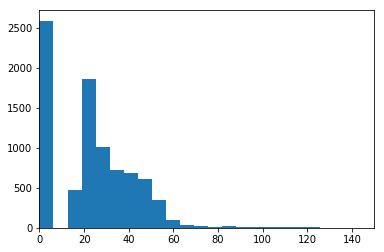

In [29]:
plt.hist(prediction_subset['object_major_axis_length'].values.astype(np.float16), bins=250)
plt.xlim(0,150)

(0, 100)

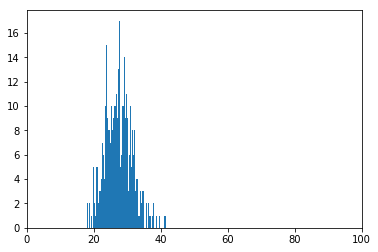

In [30]:
plt.hist(prediction_subset[prediction_subset.object_annotation_category == 'Pyramimonas']['object_major_axis_length'].values.astype(np.float16), bins=100)
plt.xlim(0,100)

In [31]:
import imagesize

small_object_ids = []


for index, row in prediction_subset.iterrows():
    width, height = imagesize.get(row['object_id']+'.png')
    #width, height = imagesize.get("test.png")
    if width < 25 or height < 25:
        #small_object_ids.append(row['object_id'])
        pass
    if row['object_bounding_box_xwidth'] < 25 or row['object_bounding_box_ywidth'] < 15:
        pass
    if row['object_major_axis_length'] < 25:
        small_object_ids.append(row['object_id'])
len(small_object_ids)

4894

In [32]:
small_df = prediction_subset[prediction_subset['object_id'].isin(small_object_ids)]

In [33]:
with pd.option_context('display.max_rows', 200):
    print(small_df.groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Nitzschia frigida        1
Pyramimonas            133
badfocus<artefact     2139
bead                     3
detritus               586
pennate 1 temp          35
pennate 2 temp          44
t002                  1637
t007                     2
t012                   309
t013                     1
temp cylindrotheca       4
Name: object_id, dtype: int64


In [34]:
with pd.option_context('display.max_rows', 200):
    print(prediction_subset.groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora                     1
Chaetoceros<Mediophyceae       1
Ciliophora                     1
Cryptophyta                 1624
Cylindrotheca                  4
Eucampia                       1
Gymnodinium                   19
Gyrodinium                     1
Katodinium                     2
Navicula                       1
Nitzschia frigida             14
Pyramimonas                  423
badfocus<artefact           2211
bead                           3
bubble                        20
centric 1 temp                 5
centric 2 temp                53
centric 3 temp                 7
chain<centric                  2
chain<pennate                  8
detritus                    1119
dinoflagellate-i              28
dinoflagellate-ii             83
part<other                     5
pennate 1 temp               111
pennate 10 temp                2
pennate 11 temp               46
pennate 2 temp               303
pennate 7 temp                 1
t002            

(0, 150)

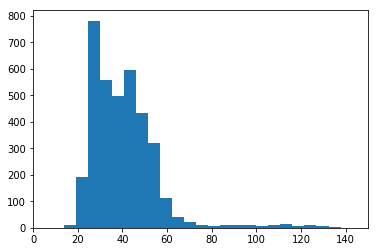

In [35]:
plt.hist(prediction_subset[~prediction_subset['object_id'].isin(small_object_ids)]['object_bounding_box_xwidth'], bins=250)
plt.xlim(0,150)

detritus


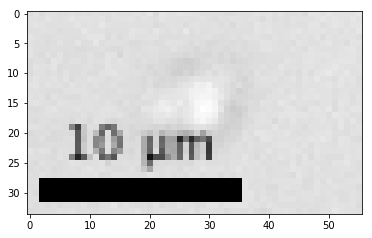

badfocus<artefact


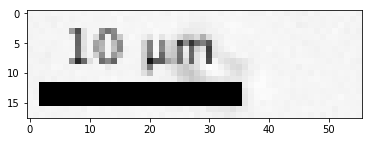

t002


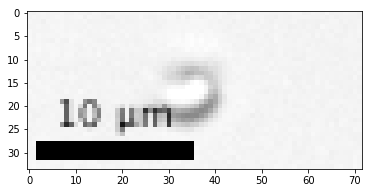

t002


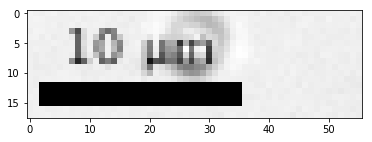

t002


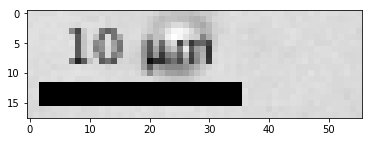

t002


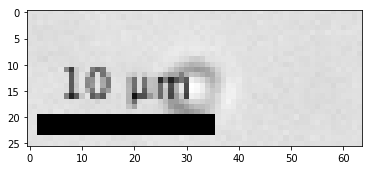

detritus


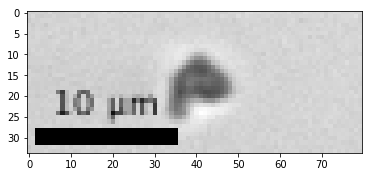

badfocus<artefact


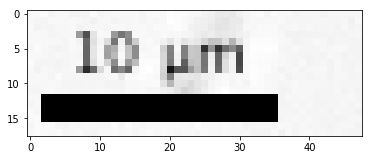

badfocus<artefact


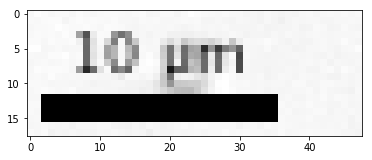

badfocus<artefact


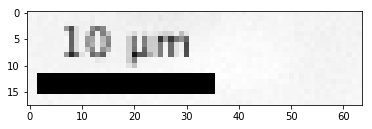

badfocus<artefact


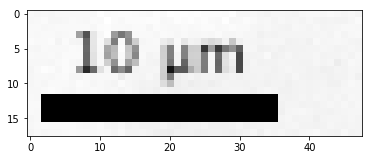

badfocus<artefact


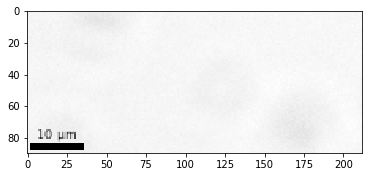

t002


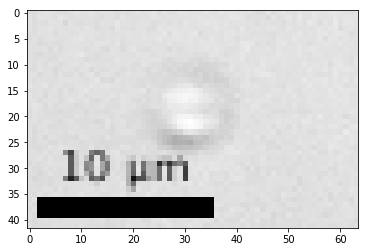

detritus


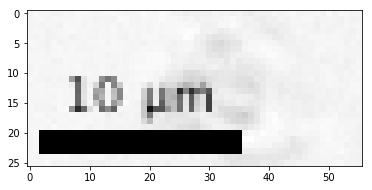

t002


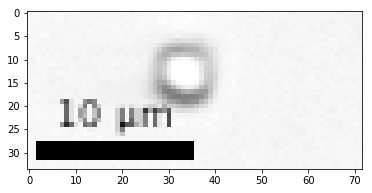

badfocus<artefact


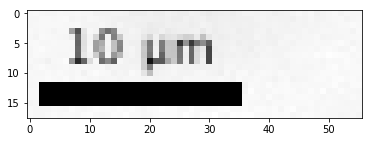

badfocus<artefact


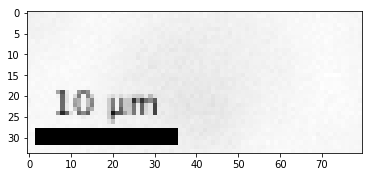

badfocus<artefact


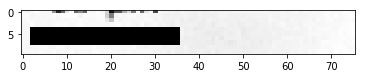

badfocus<artefact


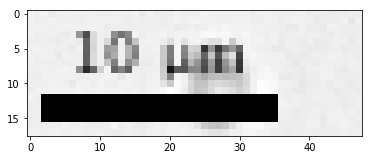

t002


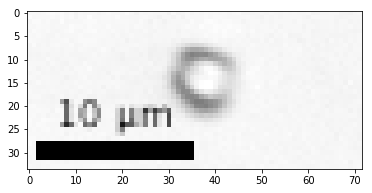

detritus


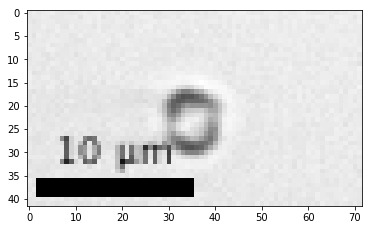

badfocus<artefact


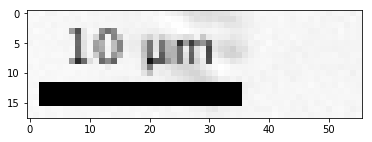

badfocus<artefact


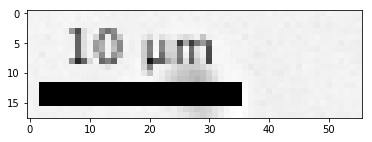

badfocus<artefact


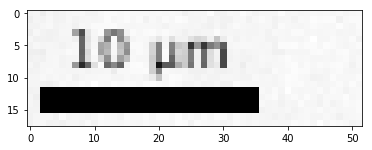

badfocus<artefact


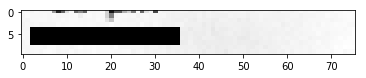

t002


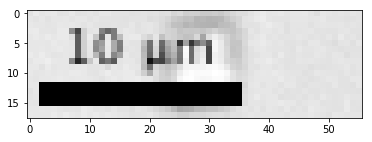

t002


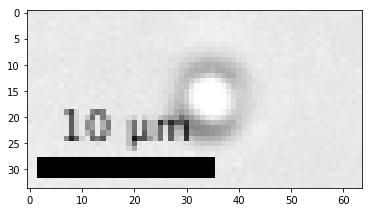

t002


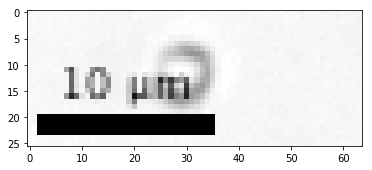

t012


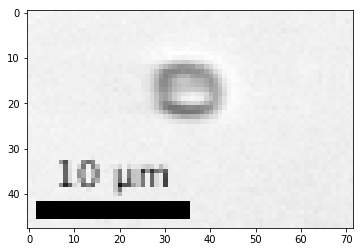

detritus


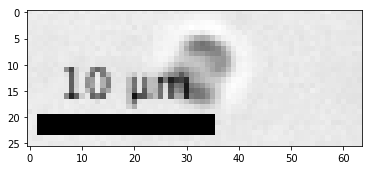

badfocus<artefact


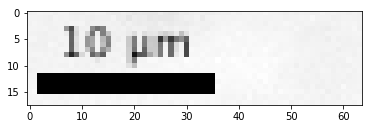

badfocus<artefact


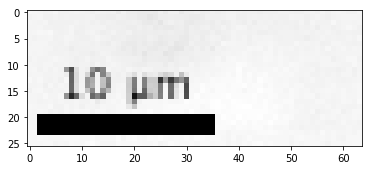

badfocus<artefact


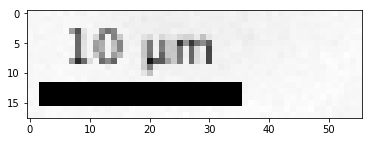

badfocus<artefact


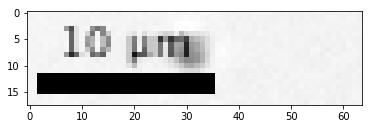

badfocus<artefact


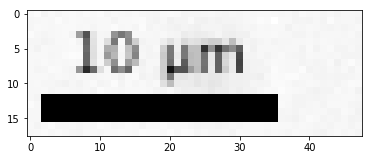

badfocus<artefact


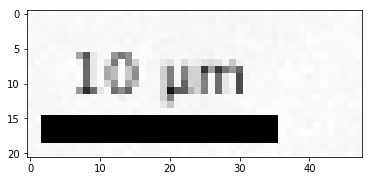

detritus


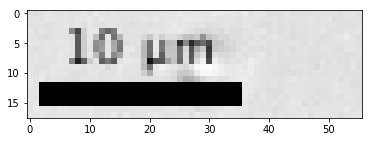

t002


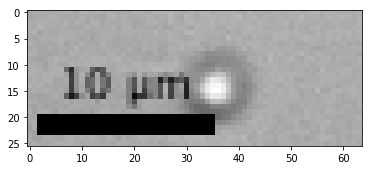

badfocus<artefact


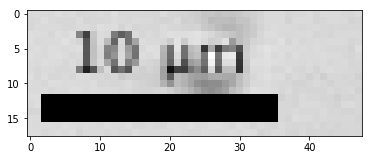

badfocus<artefact


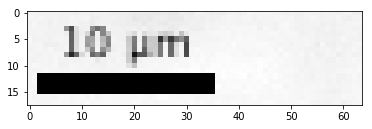

In [36]:
import cv2
for index, row in small_df.sample(n=40).iterrows():
    print(row['object_annotation_category'])
    im = cv2.imread(row['object_id']+'.png', cv2.IMREAD_GRAYSCALE)
    plt.imshow(im, cmap="Greys_r")
    plt.show()

In [37]:
prediction_subset = prediction_subset[~prediction_subset['object_id'].isin(small_object_ids)]
len(prediction_subset)

3694

### fake data generator

In [38]:
# prediction_subset = prediction_subset[prediction_subset['object_annotation_category'] != 'part<other']

In [39]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# images = []
# labels = []
# merged_labels = []
# original_labels = []
# flu_data = []
# object_ids_training = []


# for index, row in prediction_subset.sample(frac=1).iterrows():
    
#     # TODO need to think about optimal size and that size actually corresponds to class

#     img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
#     images.append(image.img_to_array(img))
    
#     # instead of interpolating increasing to max dimension and then padding
#     # see https://stackoverflow.com/questions/47697622/cnn-image-resizing-vs-padding-keeping-aspect-ratio-or-not/49882055#49882055
#     # based on https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/
# #     desired_size = 150
# #     im = cv2.imread('../../../Data/all_imagery/'+row['object_id']+'.png', cv2.IMREAD_GRAYSCALE)
# #     old_size = im.shape[:2] # old_size is in (height, width) format
# #     ratio = float(desired_size)/max(old_size)
# #     new_size = tuple([int(x*ratio) for x in old_size])
# #     # new_size should be in (width, height) format
# #     im = cv2.resize(im, (new_size[1], new_size[0]))
# #     delta_w = desired_size - new_size[1]
# #     delta_h = desired_size - new_size[0]
# #     top, bottom = delta_h//2, delta_h-(delta_h//2)
# #     left, right = delta_w//2, delta_w-(delta_w//2)
# #     new_im = cv2.copyMakeBorder(im, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,0)
# #     img = new_im[..., np.newaxis]
    
# #     images.append(img)
    
#     labels.append(class_id_dict[row['object_annotation_category']])
#     #merged_labels.append(row['merged_category'])
#     original_labels.append(row['object_annotation_category'])
#     #flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']]) 
#     # changes this to add all handcrafted features to the data as a vector
#     flu_data.append(np.array(row[~prediction_subset.columns.isin(cols_not_for_training)].values, dtype=np.float32))
#     #flu_data.append(np.array(row[~balanced_df.columns.isin(cols_not_for_training)].values, dtype=np.float32))
#     object_ids_training.append(row['object_id'])
    
# images = np.array(images)
# labels = np.array(labels)
# #merged_labels = np.array(merged_labels)
# original_labels = np.array(original_labels)
# flu_data = np.array(flu_data)
# object_ids_training = np.array(object_ids_training)

In [46]:
images.shape, labels.shape, flu_data.shape, object_ids_training.shape

NameError: name 'images' is not defined

In [47]:
np.mean(images/255), np.std(images/255)

NameError: name 'np' is not defined

In [48]:
np.count_nonzero(np.isnan(flu_data),axis=0)

NameError: name 'np' is not defined

### The real generator

In [40]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

def generate_data(available_subset, batch_size):
    """Replaces Keras' native ImageDataGenerator."""
    i = 0
    while True:
        images = []
        labels = []
        merged_labels = []
        original_labels = []
        flu_data = []
        
        for b in range(batch_size):
            if i >= len(available_subset):
                i=0
            row = available_subset.iloc[i]
            i+=1
            
#             img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
#             images.append(image.img_to_array(img))
            desired_size = 150
            im = cv2.imread(row['object_id']+'.png', cv2.IMREAD_GRAYSCALE)
            old_size = im.shape[:2] # old_size is in (height, width) format
            ratio = float(desired_size)/max(old_size)
            new_size = tuple([int(x*ratio) for x in old_size])
            # new_size should be in (width, height) format
            im = cv2.resize(im, (new_size[1], new_size[0]))
            delta_w = desired_size - new_size[1]
            delta_h = desired_size - new_size[0]
            top, bottom = delta_h//2, delta_h-(delta_h//2)
            left, right = delta_w//2, delta_w-(delta_w//2)
            new_im = cv2.copyMakeBorder(im, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,0)
            img = new_im[..., np.newaxis]
            images.append(img)
    
            #labels.append(class_id_dict[row['merged_category']])
            #merged_labels.append(row['merged_category'])
            #original_labels.append(row['object_annotation_category'])
            flu_data.append(np.array(row[~available_subset.columns.isin(cols_not_for_training)].values, dtype=np.float32))
        
        # normalize
        image_batch = np.array(images) / 255
        flu_batch = np.array(flu_data)
        #flu_batch[np.isnan(flu_batch)] = 0
        flu_batch = scaler.transform(flu_batch)
        
        
        yield [image_batch, flu_batch]
        #yield [image_batch]

In [41]:
1630000 / 500, 3038000/500

(3260.0, 6076.0)

In [42]:
predict_prob = model.predict_generator(generator = generate_data(prediction_subset,batch_size=1), steps=len(prediction_subset)/1, verbose=1)
#predict_prob = model.predict([X_predict, flu_data])

3694/3694 [==============================] - 54s 15ms/step


In [43]:
predict_prob.shape

(3694, 40)

In [44]:
predictions = np.argmax(predict_prob, axis=1)

In [45]:
predict_prob_values = []
for i in range(len(predictions)):
    predict_prob_values.append(predict_prob[i][predictions[i]])

In [46]:
np.mean(predict_prob_values), np.std(predict_prob_values)

(0.8815361, 0.17162669)

(array([  18.,   45.,   87.,  178.,  143.,  157.,  189.,  238.,  326.,
        2313.]),
 array([0.26108724, 0.33497852, 0.4088698 , 0.48276106, 0.55665237,
        0.6305436 , 0.7044349 , 0.77832615, 0.85221744, 0.9261087 ,
        1.        ], dtype=float32),
 <a list of 10 Patch objects>)

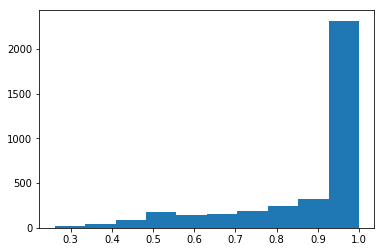

In [47]:
plt.hist(predict_prob_values)

In [48]:
prediction_subset['image_file_name'] = prediction_subset['object_id'] + '.png'

In [49]:
len(predictions), len(prediction_subset)

(3694, 3694)

In [50]:
prediction_subset['object_annotation_category'] = [id_class_dict[x] for x in predictions]

In [51]:
prediction_subset['object_score'] = predict_prob_values

In [52]:
prediction_subset['object_annotation_status'] = 'Predicted'

In [53]:
prediction_subset = prediction_subset[['object_id','object_annotation_status','object_annotation_category','sample_flag','object_lat','object_lon','image_file_name','object_score']]

In [54]:
len(prediction_subset)

3694

In [55]:
prediction_subset.head()

,object_id,object_annotation_status,object_annotation_category,sample_flag,object_lat,object_lon,image_file_name,object_score
0,D20171212T201207_IFCB116_00106,Predicted,dinoflagellate-i,good,-64.7356,-64.1037,D20171212T201207_IFCB116_00106.png,0.765934
2,D20171212T201207_IFCB116_00602,Predicted,Pyramimonas,good,-64.7356,-64.1037,D20171212T201207_IFCB116_00602.png,0.999228
3,D20171212T201207_IFCB116_01090,Predicted,Pyramimonas,good,-64.7356,-64.1037,D20171212T201207_IFCB116_01090.png,0.867389
5,D20171212T201207_IFCB116_02314,Predicted,t007,good,-64.7356,-64.1037,D20171212T201207_IFCB116_02314.png,0.999790
6,D20171212T201207_IFCB116_02322,Predicted,Nitzschia frigida,good,-64.7356,-64.1037,D20171212T201207_IFCB116_02322.png,0.718683


In [56]:
classes, counts = np.unique(predictions, return_counts=True)
classes, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38,
        39]),
 array([  11,   11,    2,    4,    1, 1285,   21,   28,    1,    1,    5,
           1,    9,  126,    6,  367,  203,    1,    1,   34,   89,    1,
           3,  135,   69,  101,    1,  270,   11,   18,  274,   39,  442,
          32,   91]))

In [57]:
# go through the final predictions and find images where there are less than 150 validated and only include those in the final

# then only get ~300 of those maximum

In [58]:
prediction_subset.to_csv('live_predictions_10000_230221_1.csv', sep='\t')

In [49]:
#prediction_subset= pd.read_csv('../../live/all_imagery/live_predictions_all_240121.csv', sep='\t')

### this grabs a random sample of these predictions

In [50]:
10000 / len(prediction_subset)

1.0507512871703268

In [ ]:
len(prediction_subset.sample(frac=.0032916))

In [ ]:
sample_prediction_subset = prediction_subset.sample(frac=.0032916)

In [ ]:
sample_prediction_subset.to_csv('../../live/ecotaxa_cnn_predictions_live_with_live_model_random_sample_070221.csv', sep='\t')

In [ ]:
! pwd

### The below couple blocks allow filtering to only the rare classes for model iteration

In [ ]:
val_samples = pd.read_csv('../val_samples_021120.csv')
val_samples = val_samples.drop('Unnamed: 0', 1)
val_samples.head()

In [ ]:
# For now only using validated images
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

rare_count = 250

unique_validated = val_samples[val_samples.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

rare_classes = unique_validated[unique_validated <= rare_count]

#val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(rare_classes.index))]
rare_classes

In [ ]:
rare_prediction_subset = prediction_subset[prediction_subset['object_annotation_category'].isin(list(rare_classes.index))]

In [ ]:
rare_prediction_subset.head()

In [ ]:
prediction_counts = rare_prediction_subset.groupby('object_annotation_category')['object_id'].nunique()
prediction_counts

In [ ]:
# filter out any that are in validation for the other file

rare_prediction_subset = rare_prediction_subset[~rare_prediction_subset.object_id.isin(list(img_md_subset.object_id))]

In [ ]:
prediction_counts = rare_prediction_subset.groupby('object_annotation_category')['object_id'].nunique()
prediction_counts

In [ ]:
len(rare_prediction_subset)

In [ ]:
# no longer doing this because we're actually assessing the accuracy
#rare_prediction_subset = rare_prediction_subset.sort_values('object_score', ascending=False)

In [ ]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 300

for index, row in rare_prediction_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

rare_cut_df = rare_prediction_subset[rare_prediction_subset['object_id'].isin(object_ids)]
rare_cut_df.head()

In [ ]:
dtps = []
for dt in rare_cut_df.dtypes:
    if dt == 'float64':
        dtps.append('f')
    elif dt == 'object':
        dtps.append('t')
for f in dtps:
    print('['+f+']')

In [ ]:
rare_cut_df.to_csv('../ecotaxa_cnn_predictions_5150000_rare_131020.csv', sep='\t')

### Now to just output N of each class

In [ ]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

n = 100

for index, row in prediction_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < n:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

preds_n_per_class_df = prediction_subset[prediction_subset['object_id'].isin(object_ids)]
preds_n_per_class_df.head()

In [ ]:
len(preds_n_per_class_df)

In [ ]:
counts_per_class = preds_n_per_class_df.groupby('object_annotation_category')['object_id'].nunique()
counts_per_class.plot()

In [ ]:
preds_n_per_class_df.to_csv('../ecotaxa_cnn_predictions_preserved_with_live_model_100_per_class_250121.csv', sep='\t')

In [ ]:
[t]
[t]
[t]
[t]
[f]
[f]
[t]
[f]

In [ ]:
dtps = []
for dt in preds_n_per_class_df.dtypes:
    if dt == 'float64':
        dtps.append('f')
    elif dt == 'object':
        dtps.append('t')
for f in dtps:
    print('['+f+']')

In [ ]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(counts, classes)
ax.set_yticks(classes)
ax.set_yticklabels([id_class_dict[x] for x in classes])
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('../output_predictions_131020.png', dpi=300)
plt.show()

In [ ]:
min_count = 20
unique_validated = available_subset.groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

In [ ]:
len(sufficient_classes)

In [ ]:
#classes, counts = np.unique(labels, return_counts=True)
classes, counts

In [ ]:
sufficient_classes

In [ ]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax.set_yticks(range(0,len(sufficient_classes)))
ax.set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(18, 18))
ax[1].scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax[1].set_yticks(range(0,len(sufficient_classes)))
ax[1].set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[1].set_axisbelow(True)
ax[1].set_xlim(-10,5000)
ax[1].set_title("Predictions")


# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax[0].scatter(counts, classes)
ax[0].set_yticks(range(0,len(class_id_dict)))
ax[0].set_yticklabels([id_class_dict[x] for x in classes])
ax[0].set_xlim(-10,2500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[0].set_axisbelow(True)
ax[0].set_title("Validated Data")

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('output_predictions_comparison_full.png', dpi=300)
plt.show()

### pull out only validated images and run it on them and see how close the total numbers compare

In [79]:
! pwd

/host/Data/fresh_data_012121/live/all_imagery


In [ ]:
! ls ../../live

In [59]:
len(prediction_subset)

3694

In [60]:
#live_preds = pd.read_csv('../ecotaxa_cnn_predictions_preserved_with_live_model_100_per_class_250121.csv', sep='\t')
#live_preds = pd.read_csv('../../live/ecotaxa_cnn_predictions_live_100_per_class_240121.csv', sep='\t')
live_preds = prediction_subset
live_preds['validated_type'] = ''
live_preds.head()

,object_id,object_annotation_status,object_annotation_category,sample_flag,object_lat,object_lon,image_file_name,object_score,validated_type
0,D20171212T201207_IFCB116_00106,Predicted,dinoflagellate-i,good,-64.7356,-64.1037,D20171212T201207_IFCB116_00106.png,0.765934,
2,D20171212T201207_IFCB116_00602,Predicted,Pyramimonas,good,-64.7356,-64.1037,D20171212T201207_IFCB116_00602.png,0.999228,
3,D20171212T201207_IFCB116_01090,Predicted,Pyramimonas,good,-64.7356,-64.1037,D20171212T201207_IFCB116_01090.png,0.867389,
5,D20171212T201207_IFCB116_02314,Predicted,t007,good,-64.7356,-64.1037,D20171212T201207_IFCB116_02314.png,0.999790,
6,D20171212T201207_IFCB116_02322,Predicted,Nitzschia frigida,good,-64.7356,-64.1037,D20171212T201207_IFCB116_02322.png,0.718683,


In [61]:
live_val = pd.read_csv('../../ecotaxa_export_live_10000_100221.csv')
live_val.head()

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (264) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_soft,process_soft_version,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument
0,D20171212T201207_IFCB116_00106,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
1,D20171212T201207_IFCB116_00378,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
2,D20171212T201207_IFCB116_00602,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
3,D20171212T201207_IFCB116_01090,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN
4,D20171212T201207_IFCB116_01165,-64.7356,-64.1037,20171212,201207,http://pal.lternet.edu/,0,0,validated,Schuyler Nardelli,...,MATLAB,R2019b,easyIFCB,a4aa03a38c9f40d1b8fd282ef7ede108607d2d82,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2,YYYYMMDD,HHMMSS,__DUMMY_ID__185697__,NaN


In [62]:
live_val = live_val[['object_id','object_annotation_category']]

live_val = live_val.rename(columns={'object_annotation_category': 'validated_type'})
live_val.head()

,object_id,validated_type
0,D20171212T201207_IFCB116_00106,Cryptophyta
1,D20171212T201207_IFCB116_00378,multiple<other
2,D20171212T201207_IFCB116_00602,t002
3,D20171212T201207_IFCB116_01090,Pyramimonas
4,D20171212T201207_IFCB116_01165,t002


In [63]:
live_val = live_val.reset_index()

In [64]:
live_val[live_val['object_id'] == 'D20171212T201207_IFCB116_00106']

,index,object_id,validated_type
0,0,D20171212T201207_IFCB116_00106,Cryptophyta


In [65]:
# update the prediction dataframe with validated labels
print(len(live_preds))
live_preds = live_preds.set_index('object_id')
live_val = live_val.set_index('object_id')
#this is effectively an upsert operation like in SQL
#live_preds = pd.concat([live_preds[~live_preds.index.isin(live_val.index)], live_val])

live_preds.update(live_val[['validated_type']])


live_preds = live_preds.reset_index()
print(len(live_preds))

3694
3694


In [66]:
live_preds.head()

,object_id,object_annotation_status,object_annotation_category,sample_flag,object_lat,object_lon,image_file_name,object_score,validated_type
0,D20171212T201207_IFCB116_00106,Predicted,dinoflagellate-i,good,-64.7356,-64.1037,D20171212T201207_IFCB116_00106.png,0.765934,Cryptophyta
1,D20171212T201207_IFCB116_00602,Predicted,Pyramimonas,good,-64.7356,-64.1037,D20171212T201207_IFCB116_00602.png,0.999228,t002
2,D20171212T201207_IFCB116_01090,Predicted,Pyramimonas,good,-64.7356,-64.1037,D20171212T201207_IFCB116_01090.png,0.867389,Pyramimonas
3,D20171212T201207_IFCB116_02314,Predicted,t007,good,-64.7356,-64.1037,D20171212T201207_IFCB116_02314.png,0.999790,t002
4,D20171212T201207_IFCB116_02322,Predicted,Nitzschia frigida,good,-64.7356,-64.1037,D20171212T201207_IFCB116_02322.png,0.718683,detritus


In [67]:
class_id_dict = {'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'bubble': 20,
 'centric': 21,
 'centric 1 temp': 22,
 'centric 2 temp': 23,
 'centric 3 temp': 24,
 'chain<centric': 25,
 'chain<pennate': 26,
 'detritus': 27,
 'dinoflagellate-i': 28,
 'dinoflagellate-ii': 29,
 'dinoflagellate-iii': 30,
 'pennate 1 temp': 31,
 'pennate 10 temp': 32,
 'pennate 11 temp': 33,
 'pennate 2 temp': 34,
 'pennate 7 temp': 35,
 't007': 36,
 't012': 37,
 't013': 38,
 'temp cylindrotheca': 39}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())
list(id_class_dict)

[id_class_dict[i] for i in range(len(id_class_dict))]

['Amphiprora',
 'Chaetoceros single',
 'Chaetoceros<Mediophyceae',
 'Ciliophora',
 'Corethron',
 'Cryptophyta',
 'Cylindrotheca',
 'Dactyliosolen',
 'Dictyochales',
 'Eucampia',
 'Gymnodinium',
 'Gyrodinium',
 'Katodinium',
 'Membraneis',
 'Navicula',
 'Nitzschia frigida',
 'Phaeocystis',
 'Proboscia sp.',
 'Pseudo-Nitzschia chain',
 'Pyramimonas',
 'bubble',
 'centric',
 'centric 1 temp',
 'centric 2 temp',
 'centric 3 temp',
 'chain<centric',
 'chain<pennate',
 'detritus',
 'dinoflagellate-i',
 'dinoflagellate-ii',
 'dinoflagellate-iii',
 'pennate 1 temp',
 'pennate 10 temp',
 'pennate 11 temp',
 'pennate 2 temp',
 'pennate 7 temp',
 't007',
 't012',
 't013',
 'temp cylindrotheca']

In [68]:
live_preds_no_unknowns = live_preds[live_preds['validated_type'] != 'Unknowns']
live_preds_no_unknowns = live_preds_no_unknowns[live_preds_no_unknowns['validated_type'] != 'part<other']
live_preds_no_unknowns = live_preds_no_unknowns[live_preds_no_unknowns['validated_type'] != 'multiple<other']
live_preds_no_unknowns = live_preds_no_unknowns[live_preds_no_unknowns['validated_type'] != 'bead']
live_preds_no_unknowns = live_preds_no_unknowns[live_preds_no_unknowns['validated_type'] != 'badfocus<artefact']
live_preds_no_unknowns = live_preds_no_unknowns[live_preds_no_unknowns['validated_type'] != 't002']

len(live_preds_no_unknowns)

3435

In [69]:
live_preds[live_preds['validated_type']== 'part<other']

,object_id,object_annotation_status,object_annotation_category,sample_flag,object_lat,object_lon,image_file_name,object_score,validated_type
2284,D20200107T075829_IFCB116_01831,Predicted,pennate 1 temp,good,-64.8868,-64.5563,D20200107T075829_IFCB116_01831.png,0.706115,part<other
2956,D20200109T060620_IFCB116_05882,Predicted,temp cylindrotheca,good,-64.9769,-64.2456,D20200109T060620_IFCB116_05882.png,0.781121,part<other
3415,D20200113T140603_IFCB116_00337,Predicted,pennate 2 temp,good,-66.0043,-67.9661,D20200113T140603_IFCB116_00337.png,0.951041,part<other
3655,D20200110T114949_IFCB116_09365,Predicted,Dactyliosolen,good,-64.697,-65.0245,D20200110T114949_IFCB116_09365.png,0.967442,part<other
3681,D20200110T132323_IFCB116_05836,Predicted,pennate 1 temp,good,-64.697,-65.0245,D20200110T132323_IFCB116_05836.png,0.998526,part<other


In [70]:
# buckets = {}
# for key in id_class_dict:
#     buckets[key] = 0

# object_ids = []

# max_count = 5

# # TODO need to somehow prioritize the undersampled classes first or they might only consist of the highly available ones
# # this might be easier if merge them after this step...
# for index, row in live_preds_no_unknowns.iterrows():
#     if buckets[class_id_dict[row['validated_type']]] < max_count:
#         object_ids.append(row['object_id'])
#         buckets[class_id_dict[row['validated_type']]] += 1
# len(object_ids)

# live_preds_no_unknowns = live_preds_no_unknowns[live_preds_no_unknowns['object_id'].isin(object_ids)]
# len(live_preds_no_unknowns)

In [71]:
all_preds = [class_id_dict[x] for x in live_preds_no_unknowns['object_annotation_category']]
all_labs = [class_id_dict[x] for x in live_preds_no_unknowns['validated_type']]

In [72]:
live_preds_no_unknowns['correct']  = 0

In [73]:
live_preds_no_unknowns.loc[live_preds_no_unknowns['object_annotation_category'] == live_preds_no_unknowns['validated_type'], 'correct'] = 1

(array([ 16.,  39.,  69., 113.,  99., 100., 130., 126., 173., 630.]),
 array([0.26108724, 0.33497851, 0.40886979, 0.48276107, 0.55665234,
        0.63054362, 0.7044349 , 0.77832617, 0.85221745, 0.92610872,
        1.        ]),
 <a list of 10 Patch objects>)

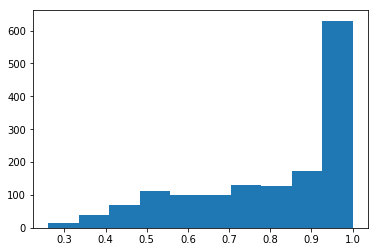

In [74]:
plt.hist(live_preds_no_unknowns[live_preds_no_unknowns['correct']==0]['object_score'])

(array([   5.,    9.,   31.,   45.,   38.,   47.,   46.,   83.,  135.,
        1501.]),
 array([0.31130701, 0.38017631, 0.44904561, 0.51791491, 0.58678421,
        0.65565351, 0.72452281, 0.7933921 , 0.8622614 , 0.9311307 ,
        1.        ]),
 <a list of 10 Patch objects>)

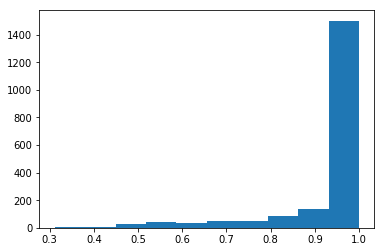

In [75]:
plt.hist(live_preds_no_unknowns[live_preds_no_unknowns['correct']==1]['object_score'])

In [76]:
np.sum(np.array(all_preds) == np.array(all_labs)) / len(all_labs)

0.5647743813682679

In [77]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), average='weighted', labels=list(id_class_dict.keys()))

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(0.7360471436642813, 0.5647743813682679, 0.6022570090272147, None)

In [78]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), 
                                average=None, labels=list(id_class_dict.keys()))

In [79]:
precision, recall

(array([0.        , 0.        , 0.5       , 0.25      , 0.        ,
        0.9618677 , 0.0952381 , 0.        , 0.        , 1.        ,
        0.4       , 0.        , 0.        , 0.        , 0.        ,
        0.10084034, 0.        , 0.        , 0.        , 0.41904762,
        0.11320755, 0.        , 1.        , 0.91176471, 0.04054054,
        0.        , 1.        , 0.80740741, 0.14492754, 0.52475248,
        0.        , 0.1484375 , 0.09090909, 0.83333333, 0.65413534,
        0.        , 0.20588235, 0.21813031, 0.2       , 0.09876543]),
 array([0.        , 0.        , 1.        , 1.        , 0.        ,
        0.76108374, 0.5       , 0.        , 0.        , 1.        ,
        0.10526316, 0.        , 0.        , 0.        , 0.        ,
        0.92307692, 0.        , 0.        , 0.        , 0.45517241,
        0.9       , 0.        , 0.2       , 0.58490566, 0.42857143,
        0.        , 0.25      , 0.20450281, 0.35714286, 0.63855422,
        0.        , 0.5       , 0.5       , 0.

In [80]:
classes, counts = np.unique(all_preds, return_counts=True)
true_classes, true_counts = np.unique(all_labs, return_counts=True)

filled_counts = []
prev_class = -1
i = 0
while len(filled_counts) < len(id_class_dict):
    if i >= len(classes):
        filled_counts.append(0)
        prev_class += 1
    elif classes[i] != 1+prev_class:
        filled_counts.append(0)
        prev_class += 1
    else:
        filled_counts.append(counts[i])
        i += 1
        prev_class += 1
    
filled_true_counts = []
prev_class = -1
i = 0
while len(filled_true_counts) < len(id_class_dict):
    if i >= len(true_classes):
        filled_true_counts.append(0)
        prev_class += 1
    elif true_classes[i] != 1+prev_class:
        filled_true_counts.append(0)
        prev_class += 1
    else:
        filled_true_counts.append(true_counts[i])
        i += 1
        prev_class += 1

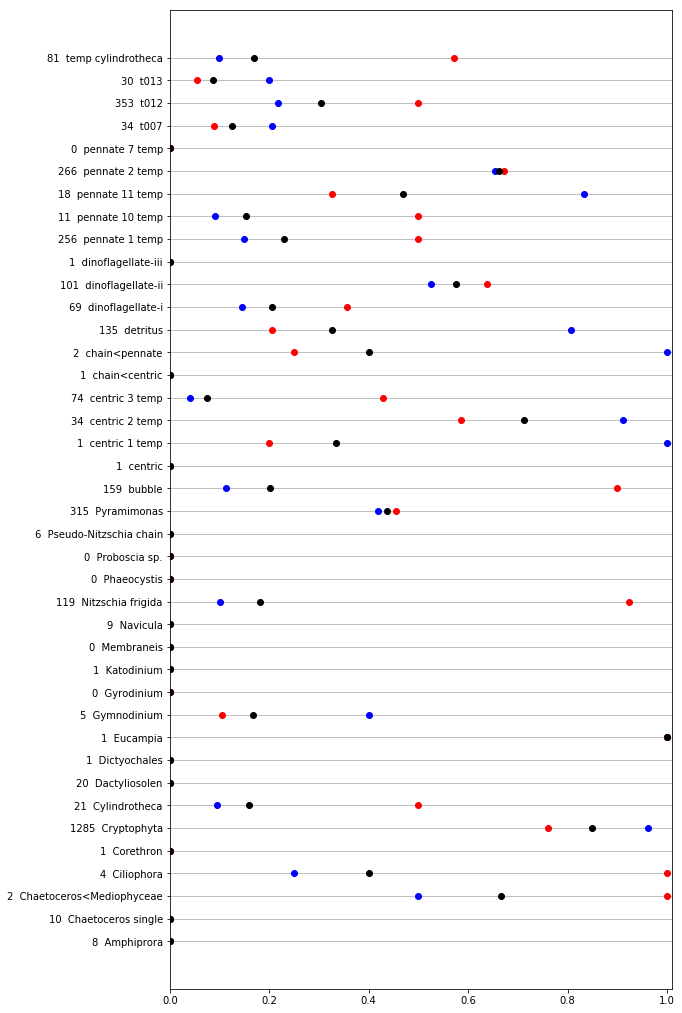

In [81]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]
nc = [str(n) + '  ' + m for m,n in zip(names,filled_counts)]
n_tc = [str(n) + '  ' + m for m,n in zip(names,filled_true_counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('merged_class_acc.png', dpi=300)
plt.show()

In [82]:
from sklearn.metrics import confusion_matrix
len(class_id_dict), confusion_matrix(np.array(all_labs), np.array(all_preds)).shape

(40, (37, 37))

In [83]:
for i in list(set(range(0,len(class_id_dict))) - set(classes)):
    all_labs.append(i)
    all_preds.append(i)
#all_labs.append(23)
#all_labs.append(32)

In [84]:

#all_preds.append(23)
#all_preds.append(32)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


Text(0.5, 318.47499999999985, 'Predicted label')

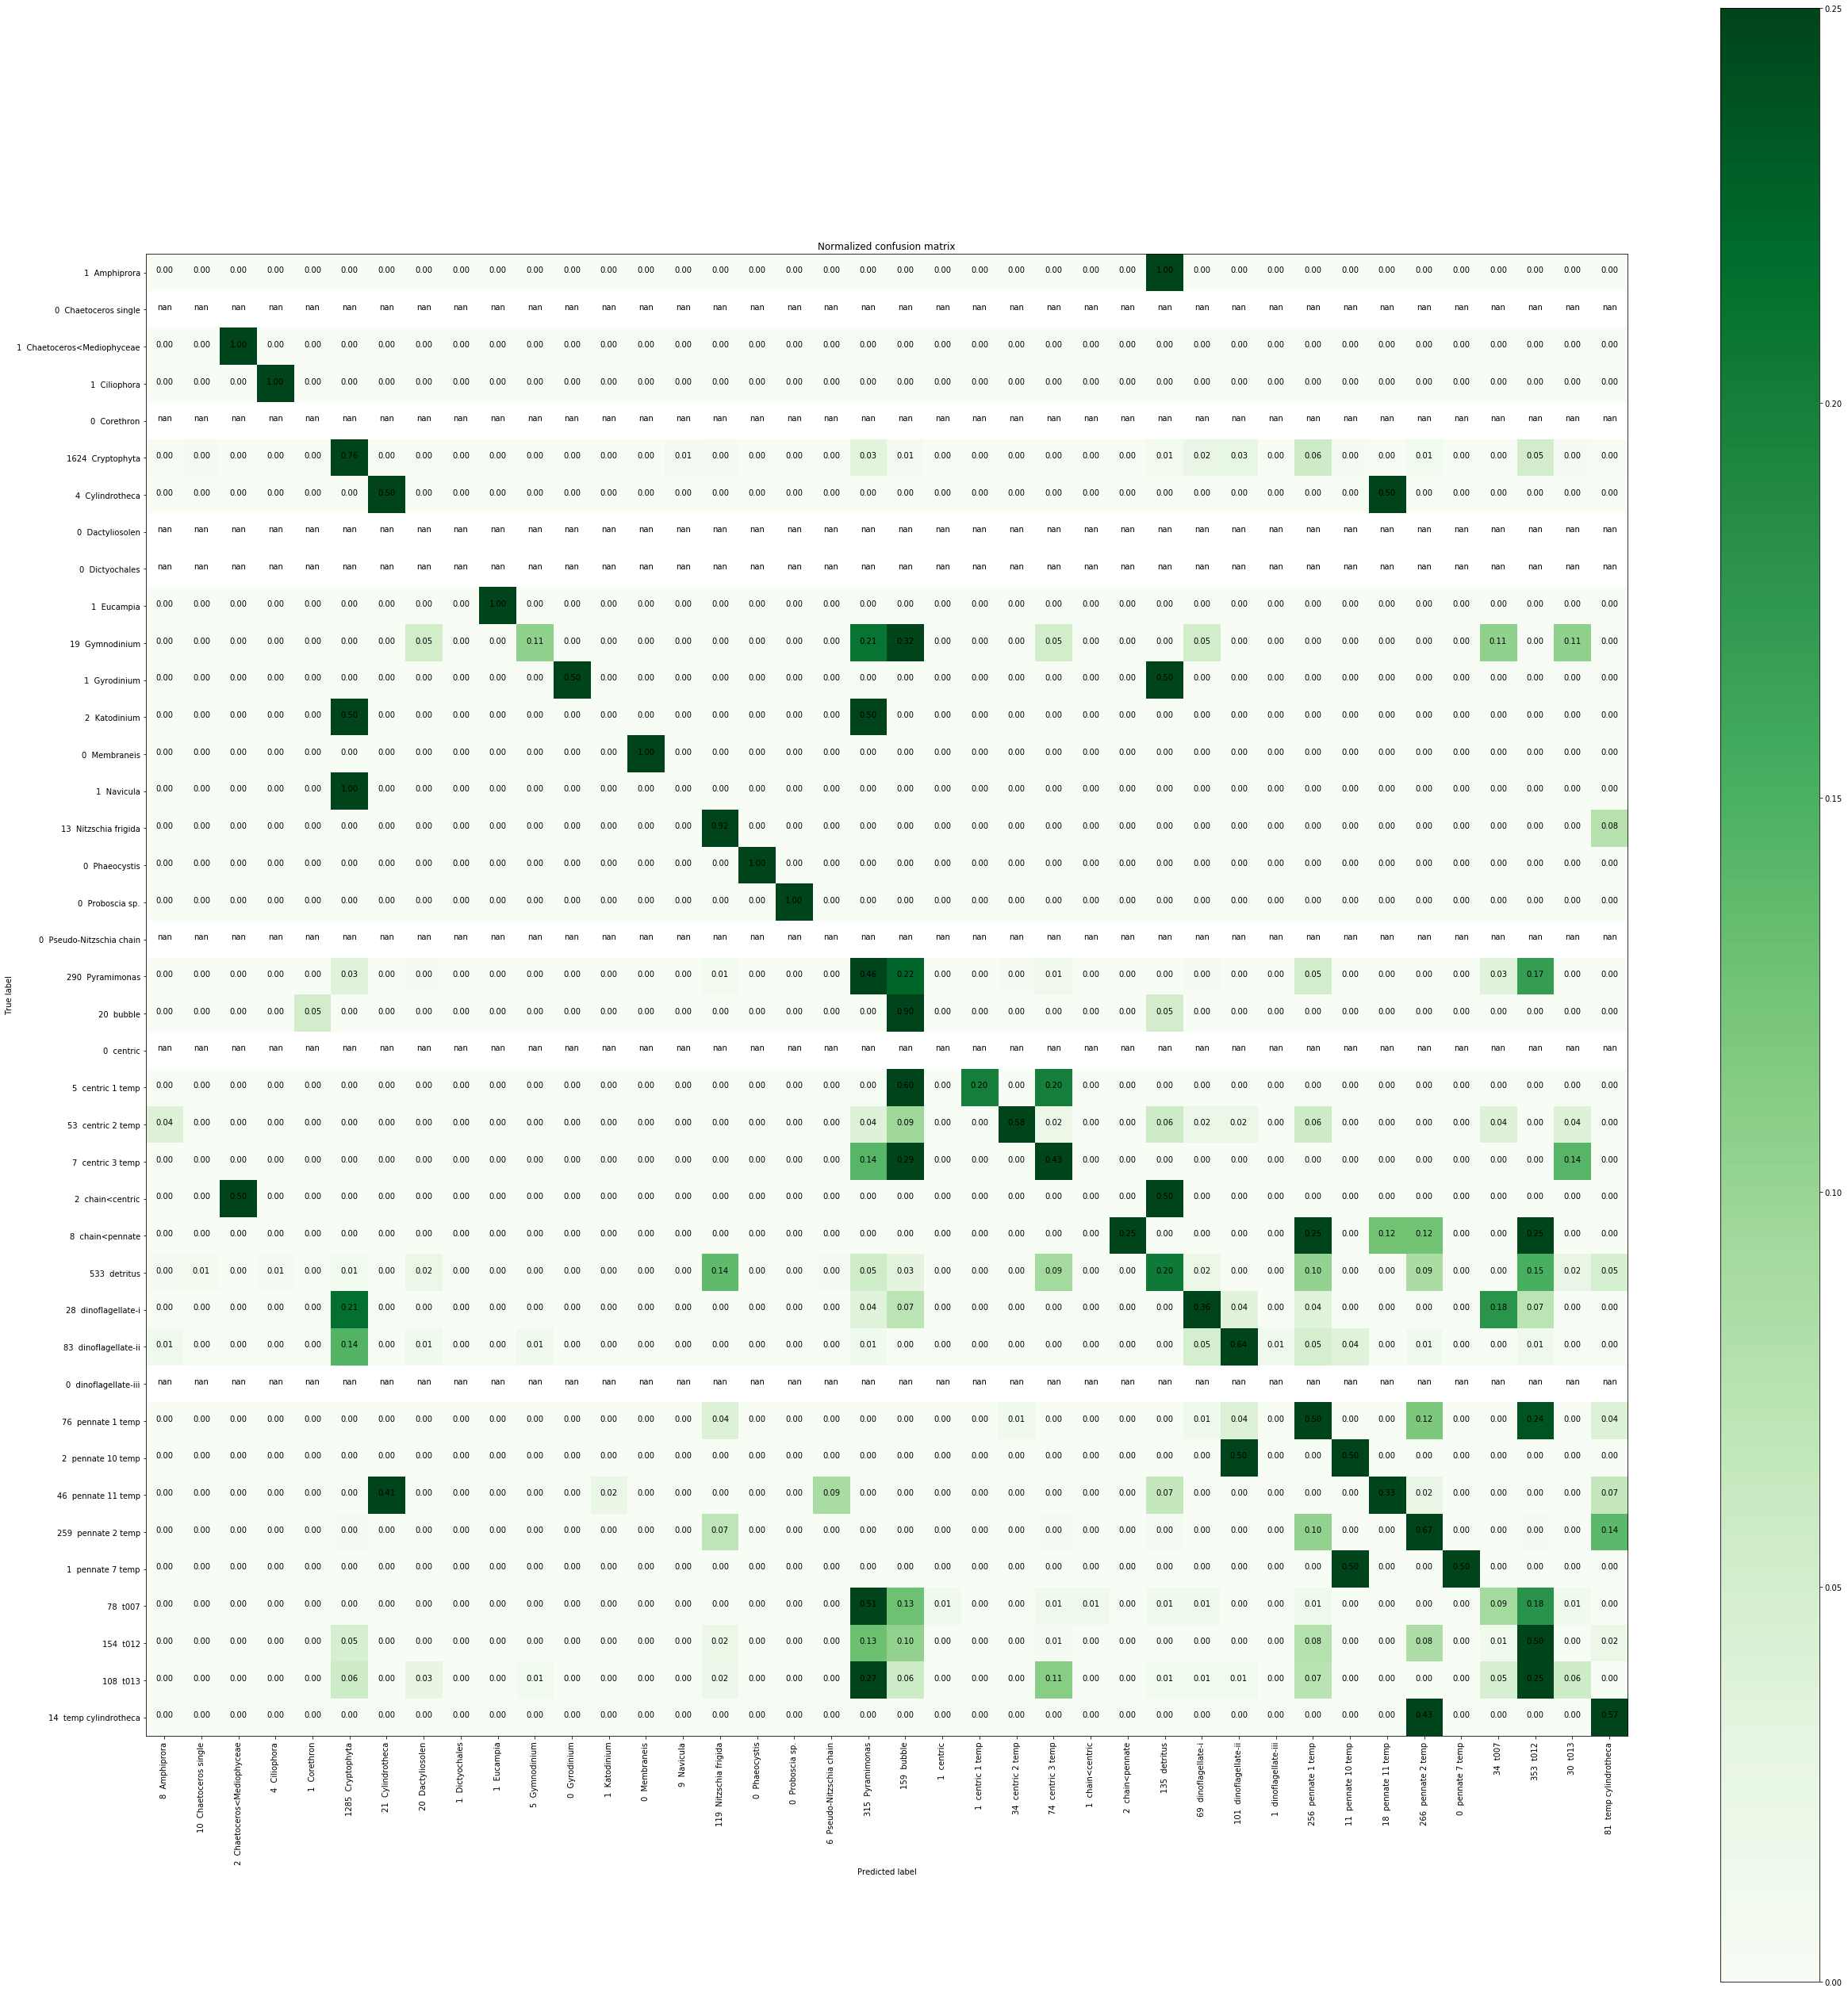

In [85]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(all_labs), np.array(all_preds))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

#print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens', vmax=0.25)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, nc, rotation=90)
plt.yticks(tick_marks, n_tc)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

#plt.savefig('../../conf_matrix_unmerged_visible_low_end_large_validated.png', dpi=300)

In [86]:
counts, classes

(array([   8,   10,    2,    4,    1, 1285,   21,   20,    1,    1,    5,
           1,    9,  119,    6,  315,  159,    1,    1,   34,   74,    1,
           2,  135,   69,  101,    1,  256,   11,   18,  266,   34,  353,
          30,   81]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38,
        39]))

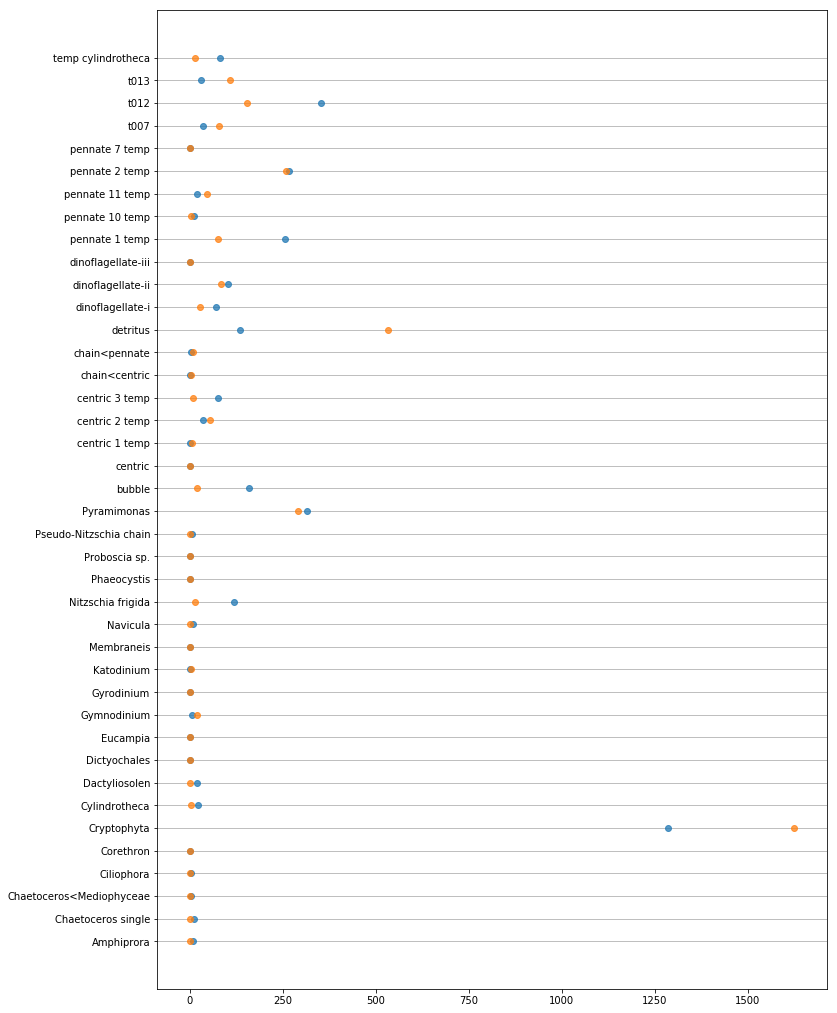

In [87]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(filled_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.scatter(filled_true_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.set_yticks(range(0,len(id_class_dict)))
ax.set_yticklabels([id_class_dict[i] for i in range(len(id_class_dict))])
#ax.set_xlim(0,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Medium merged categories

In [88]:
class_id_dict = {'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'bubble': 20,
 'centric': 21,
 'centric 1 temp': 22,
 'centric 2 temp': 23,
 'centric 3 temp': 24,
 'chain<centric': 25,
 'chain<pennate': 26,
 'detritus': 27,
 'dinoflagellate-i': 28,
 'dinoflagellate-ii': 29,
 'dinoflagellate-iii': 30,
 'pennate 1 temp': 31,
 'pennate 10 temp': 32,
 'pennate 11 temp': 33,
 'pennate 2 temp': 34,
 'pennate 7 temp': 35,
 't007': 36,
 't012': 37,
 't013': 38,
 'temp cylindrotheca': 39}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())
list(id_class_dict)

[id_class_dict[i] for i in range(len(id_class_dict))]

['Amphiprora',
 'Chaetoceros single',
 'Chaetoceros<Mediophyceae',
 'Ciliophora',
 'Corethron',
 'Cryptophyta',
 'Cylindrotheca',
 'Dactyliosolen',
 'Dictyochales',
 'Eucampia',
 'Gymnodinium',
 'Gyrodinium',
 'Katodinium',
 'Membraneis',
 'Navicula',
 'Nitzschia frigida',
 'Phaeocystis',
 'Proboscia sp.',
 'Pseudo-Nitzschia chain',
 'Pyramimonas',
 'bubble',
 'centric',
 'centric 1 temp',
 'centric 2 temp',
 'centric 3 temp',
 'chain<centric',
 'chain<pennate',
 'detritus',
 'dinoflagellate-i',
 'dinoflagellate-ii',
 'dinoflagellate-iii',
 'pennate 1 temp',
 'pennate 10 temp',
 'pennate 11 temp',
 'pennate 2 temp',
 'pennate 7 temp',
 't007',
 't012',
 't013',
 'temp cylindrotheca']

In [89]:
# Diatoms: 

## Pennate Diatoms:
amphiprora = ['Amphiprora']                    
banquisia_belgicae = ['Banquisia belgicae']
cylindrotheca = ['Cylindrotheca']                 
licmophora = ['Licmophora']
nitzschia_frigida = ['Nitzschia frigida']             
pseudo_nitzschia_chain = ['Pseudo-Nitzschia chain'] 

unidentified_single_pennate = [
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
chaetoceros_mediophyceae = ['Chaetoceros<Mediophyceae']
chaetoceros_single = ['Chaetoceros single']
corethron = ['Corethron']
eucampia_chain = ['Eucampia chain']
eucampia = ['Eucampia']
dactyliosolen = ['Dactyliosolen']
odontella = ['Odontella sp.']
proboscia = ['Proboscia sp.']
rhizosolenia = ['Rhizosolenia']
unidentified_single_centric = [
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

# Dinoflagellates: 
gyrodinium = ['Gyrodinium']
gymnodinium = ['Gymnodinium'] 
katodinium = ['Katodinium']
warnowia = ['Warnowia']
dinoflagellate_i = ['dinoflagellate-i']
dinoflagellate_ii = ['dinoflagellate-ii']
dinoflagellate_iii = ['dinoflagellate-iii']

dinophyceae = ['Dinophyceae']

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other',
    #'Unknowns'
]

In [90]:
all_classes_sep = amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes_sep)

60

In [91]:
class_str = 'amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [92]:
class_str.replace('+', "','")

"amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [93]:
classes = [amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

live_preds["merged_category"] = ""
for i in range(len(classes)):
    live_preds['merged_category'][live_preds['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [94]:
classes = [amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

live_preds["val_merged_category"] = ""
for i in range(len(classes)):
    live_preds['val_merged_category'][live_preds['validated_type'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [95]:
merged_labs_truth = []
for lab in all_labs:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs_truth.append(class_names[i])

In [96]:
merged_labs = []
for lab in all_preds:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs.append(class_names[i])

In [97]:
class_id_list = [[x, i] for i, x in enumerate(class_names)]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

id_class_dict

{0: 'amphiprora',
 1: 'banquisia_belgicae',
 2: 'cylindrotheca',
 3: 'licmophora',
 4: 'nitzschia_frigida',
 5: 'pseudo_nitzschia_chain',
 6: 'unidentified_single_pennate',
 7: 'chaetoceros_mediophyceae',
 8: 'chaetoceros_single',
 9: 'corethron',
 10: 'eucampia_chain',
 11: 'eucampia',
 12: 'dactyliosolen',
 13: 'odontella ',
 14: 'proboscia',
 15: 'rhizosolenia ',
 16: 'unidentified_single_centric',
 17: 'cryptophyta',
 18: 'gyrodinium',
 19: 'gymnodinium',
 20: 'katodinium',
 21: 'warnowia',
 22: 'dinoflagellate_i',
 23: 'dinoflagellate_ii ',
 24: 'dinoflagellate_iii',
 25: 'dinophyceae',
 26: 'pyramimonas ',
 27: 'phaeocystis',
 28: 'dictyochales ',
 29: 'ciliophora ',
 30: 'tintinnida',
 31: 'unidentified_flagellates',
 32: 'unidentified_living_cells',
 33: 'other'}

In [98]:
merged_labs_id = [class_id_dict[x] for x in merged_labs]
len(merged_labs), len(merged_labs_id)

(3440, 3440)

In [99]:
merged_truth_id = [class_id_dict[x] for x in merged_labs_truth]
len(merged_labs_truth), len(merged_truth_id)

(3440, 3440)

In [100]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), average='weighted', labels=list(id_class_dict.keys()))

(0.6871836745185378, 0.6116279069767442, 0.630786460486308, None)

In [101]:
np.sum(np.array(merged_labs_id) == np.array(merged_truth_id)) / len(merged_truth_id)

0.6116279069767442

In [102]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), 
                                average=None, labels=list(id_class_dict.keys()))

In [103]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

In [104]:
len(class_id_dict), confusion_matrix(np.array(merged_labs_id), np.array(merged_truth_id)).shape

(34, (25, 25))

In [105]:
classes, counts = np.unique(merged_labs_id, return_counts=True)
true_classes, true_counts = np.unique(merged_truth_id, return_counts=True)

filled_counts = []
prev_class = -1
i = 0
while len(filled_counts) < len(id_class_dict):
    if classes[i] != 1+prev_class:
        filled_counts.append(0)
        prev_class += 1
    else:
        filled_counts.append(counts[i])
        i += 1
        prev_class += 1
    
filled_true_counts = []
prev_class = -1
i = 0
while len(filled_true_counts) < len(id_class_dict):
    if true_classes[i] != 1+prev_class:
        filled_true_counts.append(0)
        prev_class += 1
    else:
        filled_true_counts.append(true_counts[i])
        i += 1
        prev_class += 1

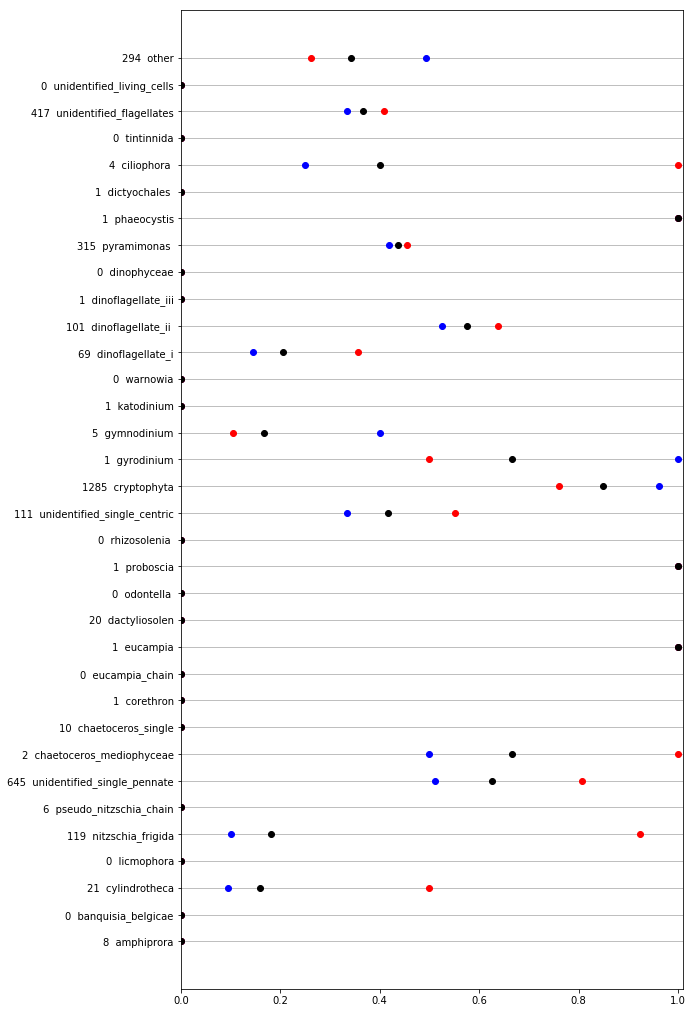

In [106]:
nc = [str(n) + '  ' + m for m,n in zip(names,filled_counts)]
n_tc = [str(n) + '  ' + m for m,n in zip(names,filled_true_counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('merged_class_acc.png', dpi=300)
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0.5, 30.27499999999995, 'Predicted label')

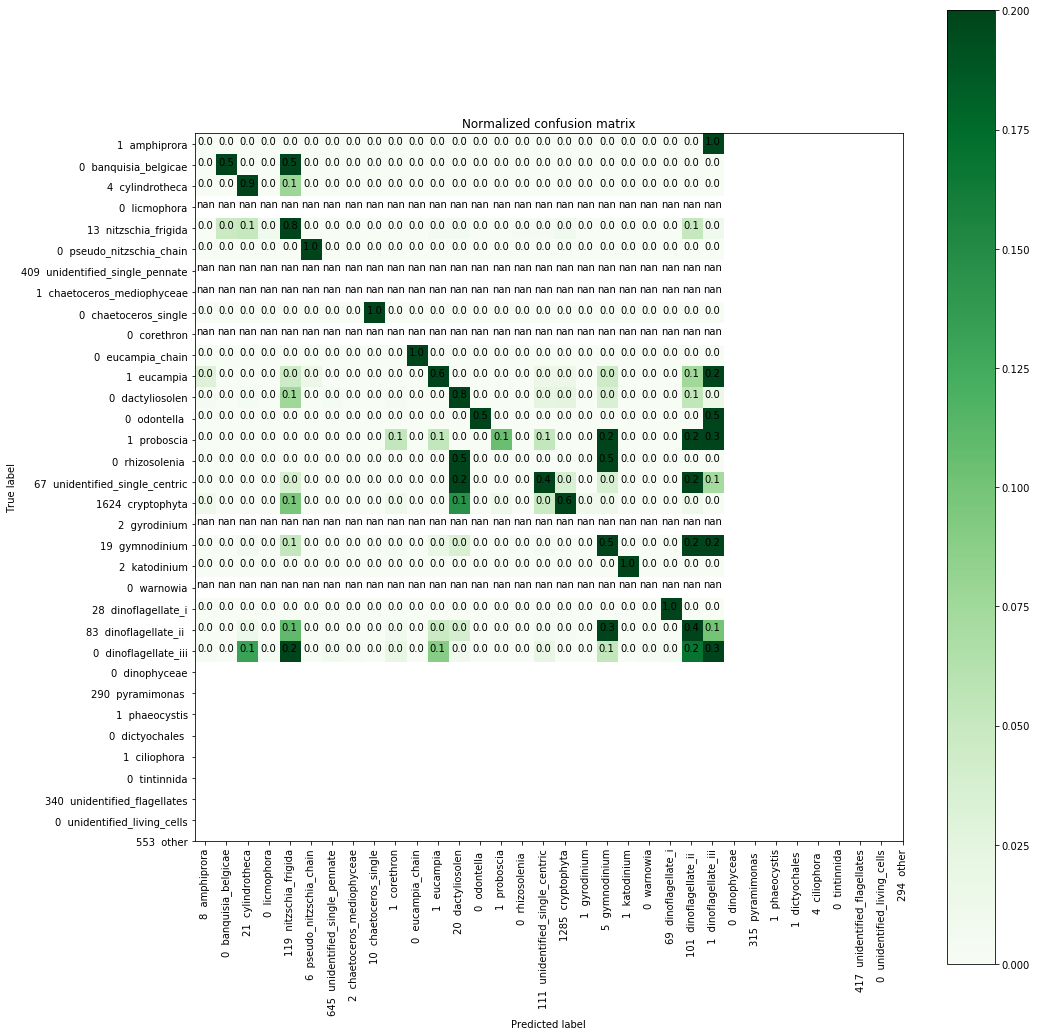

In [107]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(merged_truth_id), np.array(merged_labs_id))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens',vmax=0.2)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, nc, rotation=90)
plt.yticks(tick_marks, n_tc)

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

#plt.savefig('conf_matrix_medium_merged.png', dpi=300)

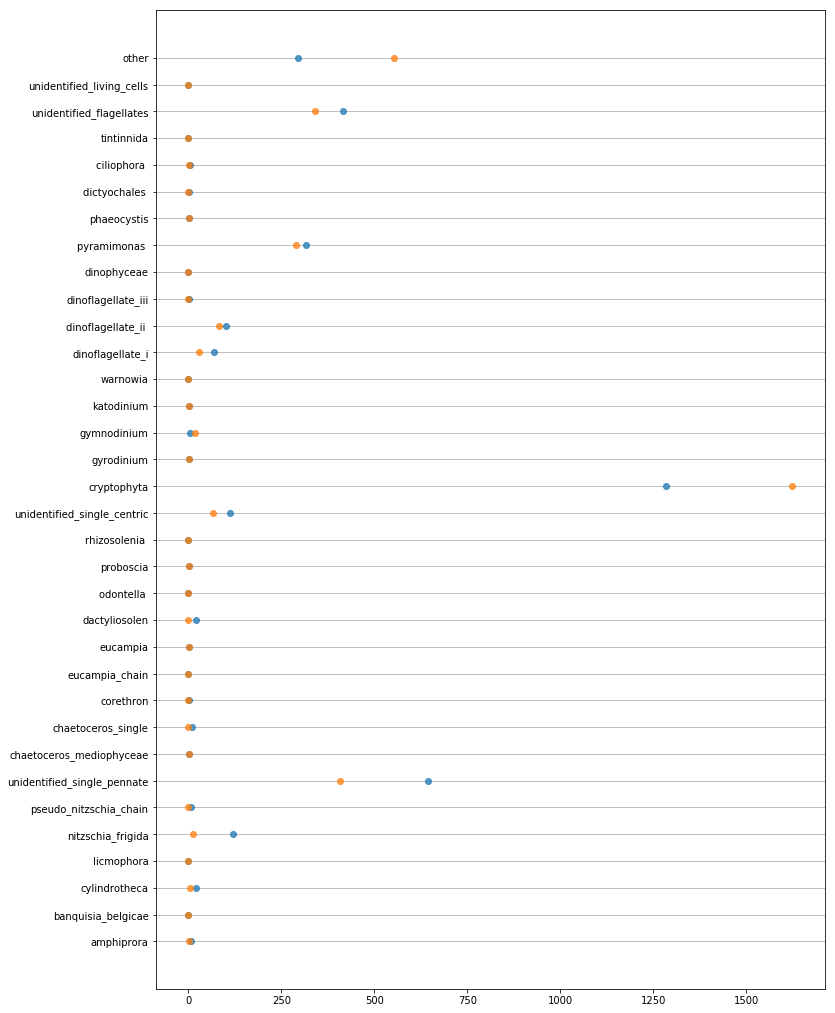

In [108]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(filled_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.scatter(filled_true_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.set_yticks(range(0,len(id_class_dict)))
ax.set_yticklabels([id_class_dict[i] for i in range(len(id_class_dict))])
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Now moving to super merged categories

In [109]:
class_id_dict = {'Amphiprora': 0,
 'Chaetoceros single': 1,
 'Chaetoceros<Mediophyceae': 2,
 'Ciliophora': 3,
 'Corethron': 4,
 'Cryptophyta': 5,
 'Cylindrotheca': 6,
 'Dactyliosolen': 7,
 'Dictyochales': 8,
 'Eucampia': 9,
 'Gymnodinium': 10,
 'Gyrodinium': 11,
 'Katodinium': 12,
 'Membraneis': 13,
 'Navicula': 14,
 'Nitzschia frigida': 15,
 'Phaeocystis': 16,
 'Proboscia sp.': 17,
 'Pseudo-Nitzschia chain': 18,
 'Pyramimonas': 19,
 'bubble': 20,
 'centric': 21,
 'centric 1 temp': 22,
 'centric 2 temp': 23,
 'centric 3 temp': 24,
 'chain<centric': 25,
 'chain<pennate': 26,
 'detritus': 27,
 'dinoflagellate-i': 28,
 'dinoflagellate-ii': 29,
 'dinoflagellate-iii': 30,
 'pennate 1 temp': 31,
 'pennate 10 temp': 32,
 'pennate 11 temp': 33,
 'pennate 2 temp': 34,
 'pennate 7 temp': 35,
 't007': 36,
 't012': 37,
 't013': 38,
 'temp cylindrotheca': 39}
id_class_dict = dict((v,k) for k,v in class_id_dict.items())
list(id_class_dict)

[id_class_dict[i] for i in range(len(id_class_dict))]

['Amphiprora',
 'Chaetoceros single',
 'Chaetoceros<Mediophyceae',
 'Ciliophora',
 'Corethron',
 'Cryptophyta',
 'Cylindrotheca',
 'Dactyliosolen',
 'Dictyochales',
 'Eucampia',
 'Gymnodinium',
 'Gyrodinium',
 'Katodinium',
 'Membraneis',
 'Navicula',
 'Nitzschia frigida',
 'Phaeocystis',
 'Proboscia sp.',
 'Pseudo-Nitzschia chain',
 'Pyramimonas',
 'bubble',
 'centric',
 'centric 1 temp',
 'centric 2 temp',
 'centric 3 temp',
 'chain<centric',
 'chain<pennate',
 'detritus',
 'dinoflagellate-i',
 'dinoflagellate-ii',
 'dinoflagellate-iii',
 'pennate 1 temp',
 'pennate 10 temp',
 'pennate 11 temp',
 'pennate 2 temp',
 'pennate 7 temp',
 't002',
 't007',
 't012',
 't013',
 'temp cylindrotheca']

In [110]:
# Diatoms: 

## Pennate Diatoms:
pennates = [
    'Amphiprora',                    
    'Banquisia belgicae',
    'Cylindrotheca'  ,             
    'Licmophora',
    'Nitzschia frigida'  ,        
    'Pseudo-Nitzschia chain',
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
centrics = [
    'Chaetoceros<Mediophyceae',
    'Chaetoceros single',
    'Corethron',
    'Eucampia chain',
    'Eucampia',
    'Dactyliosolen',
    'Odontella sp.',
    'Proboscia sp.',
    'Rhizosolenia',
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

dinoflagellates = [
    'Gyrodinium',
    'Gymnodinium',
    'Katodinium',
    'Warnowia',
    'dinoflagellate-i',
    'dinoflagellate-ii',
    'dinoflagellate-iii',
    'Dinophyceae'
]

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other'
]

In [111]:
all_classes = list(live_preds.groupby('object_annotation_category')['object_id'].nunique().index)

In [112]:
all_classes_sep = pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(35, 60)

In [113]:
list(set(all_classes) - set(all_classes_sep))

[]

In [114]:
list(set(all_classes_sep) - set(all_classes))

['pennate<Bacillariophyta',
 'Phaeocystis',
 't020',
 'Licmophora',
 'Warnowia',
 'Gyrodinium',
 'Dinophyceae',
 't009',
 't005',
 'Banquisia belgicae',
 't002',
 'Rhizosolenia',
 'Proboscia sp.',
 'Odontella sp.',
 'Eucampia chain',
 'centric 6 temp',
 'pennate 7 temp',
 'bead',
 'badfocus<artefact',
 't006',
 'centric 4 temp',
 'multiple<other',
 't019',
 'Tintinnida',
 'Membraneis']

In [115]:
class_str = 'pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [116]:
class_str.replace('+', "','")

"pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [117]:
classes = [pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

live_preds["merged_category"] = ""
for i in range(len(classes)):
    live_preds['merged_category'][live_preds['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [118]:
classes = [pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

live_preds["val_merged_category"] = ""
for i in range(len(classes)):
    live_preds['val_merged_category'][live_preds['validated_type'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [119]:
merged_labs_truth = []
for lab in all_labs:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs_truth.append(class_names[i])

In [120]:
merged_labs = []
for lab in all_preds:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs.append(class_names[i])

In [121]:
class_id_list = [[x, i] for i, x in enumerate(class_names)]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

id_class_dict

{0: 'pennates',
 1: 'centrics',
 2: 'cryptophyta',
 3: 'dinoflagellates',
 4: 'pyramimonas',
 5: 'phaeocystis',
 6: 'dictyochales',
 7: 'ciliophora',
 8: 'tintinnida',
 9: 'unidentified_flagellates',
 10: 'unidentified_living_cells',
 11: 'other'}

In [122]:
merged_labs_id = [class_id_dict[x] for x in merged_labs]
len(merged_labs), len(merged_labs_id)

(3440, 3440)

In [123]:
merged_truth_id = [class_id_dict[x] for x in merged_labs_truth]
len(merged_labs_truth), len(merged_truth_id)

(3440, 3440)

In [124]:
np.sum(np.array(merged_labs_id) == np.array(merged_truth_id)) / len(merged_truth_id)

0.6145348837209302

In [125]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), average='weighted', labels=list(id_class_dict.keys()))

(0.6778188195089719, 0.6145348837209302, 0.6267548702846327, None)

In [126]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), 
                                average=None, labels=list(id_class_dict.keys()))

In [127]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

In [128]:
len(class_id_dict), confusion_matrix(np.array(merged_labs_id), np.array(merged_truth_id)).shape

(12, (10, 10))

In [129]:
classes, counts = np.unique(merged_labs_id, return_counts=True)
true_classes, true_counts = np.unique(merged_truth_id, return_counts=True)

filled_counts = []
prev_class = -1
i = 0
while len(filled_counts) < len(id_class_dict):
    if classes[i] != 1+prev_class:
        filled_counts.append(0)
        prev_class += 1
    else:
        filled_counts.append(counts[i])
        i += 1
        prev_class += 1
    
filled_true_counts = []
prev_class = -1
i = 0
while len(filled_true_counts) < len(id_class_dict):
    if true_classes[i] != 1+prev_class:
        filled_true_counts.append(0)
        prev_class += 1
    else:
        filled_true_counts.append(true_counts[i])
        i += 1
        prev_class += 1

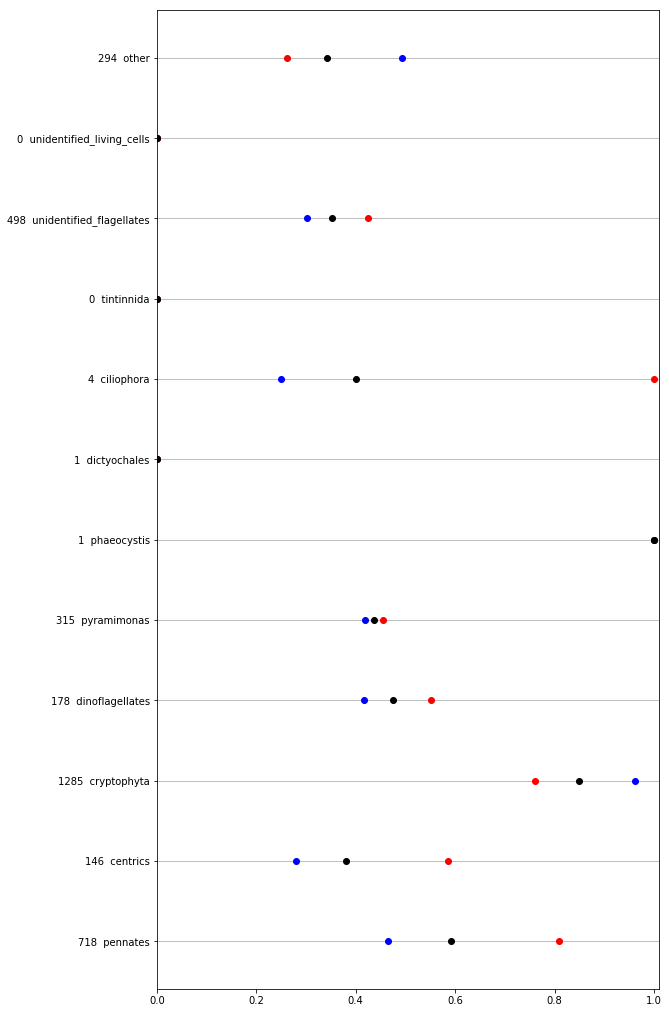

In [130]:
nc = [str(n) + '  ' + m for m,n in zip(names,filled_counts)]
n_tc = [str(n) + '  ' + m for m,n in zip(names,filled_true_counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('merged_class_acc.png', dpi=300)
plt.show()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


Text(0.5, 54.27499999999995, 'Predicted label')

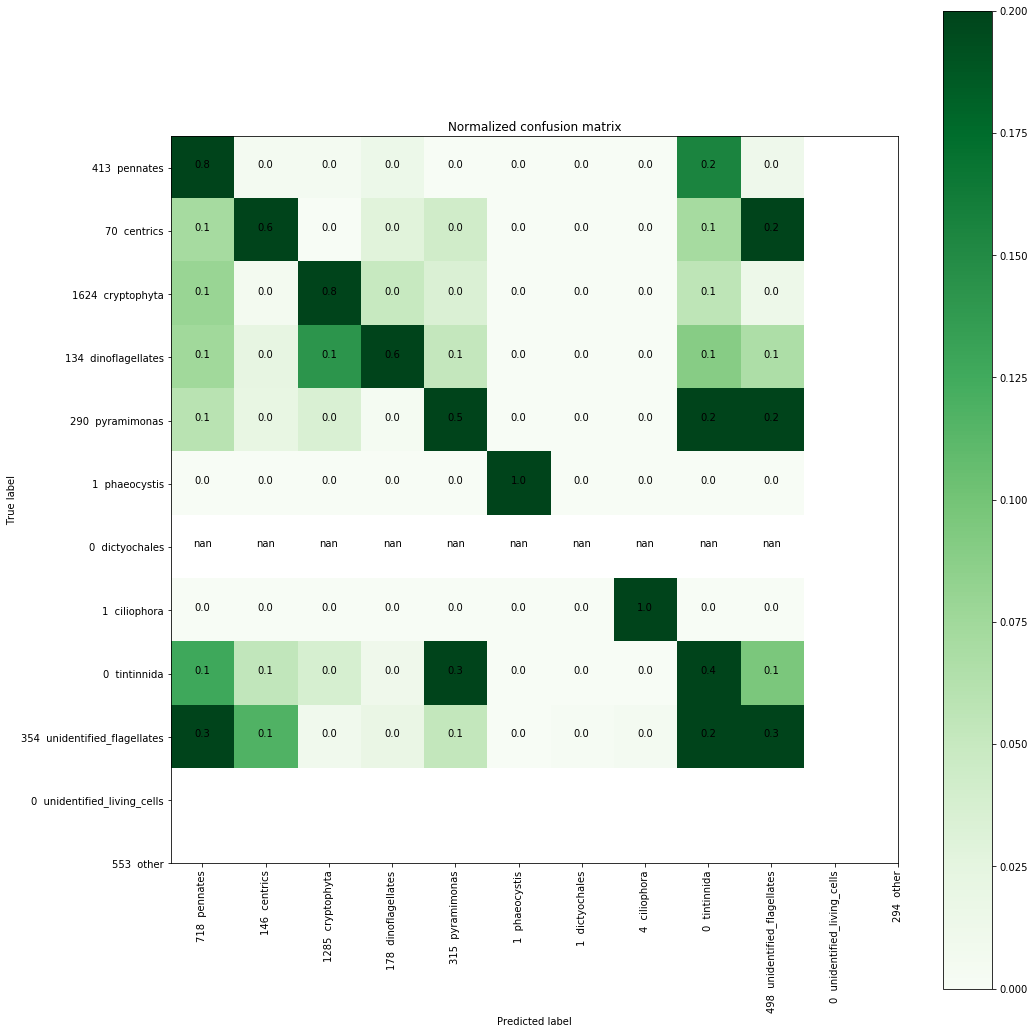

In [131]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(merged_truth_id), np.array(merged_labs_id))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens',vmax=0.2)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, nc, rotation=90)
plt.yticks(tick_marks, n_tc)

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

#plt.savefig('conf_matrix_medium_merged.png', dpi=300)

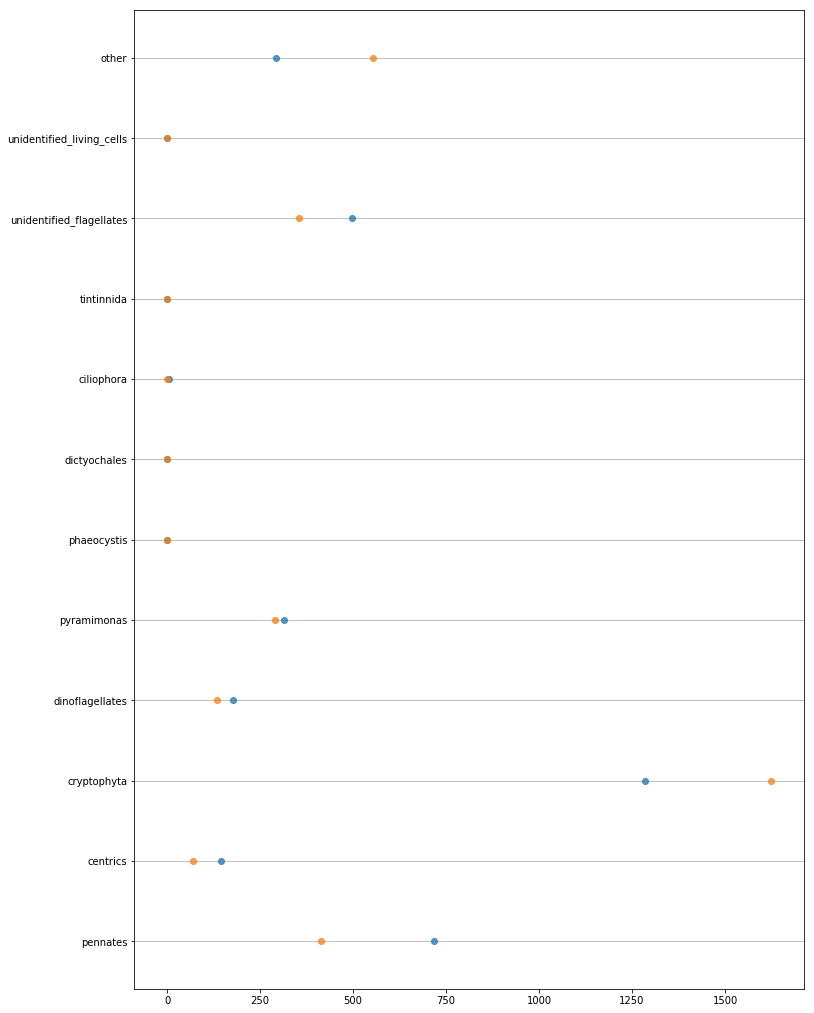

In [132]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(filled_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.scatter(filled_true_counts, range(0,len(id_class_dict)), alpha=0.75)
ax.set_yticks(range(0,len(id_class_dict)))
ax.set_yticklabels([id_class_dict[i] for i in range(len(id_class_dict))])
#ax.set_xlim(0,6000)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [131]:
! pwd

/host/Data/fresh_data_012121/live/all_imagery
